In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#Einlesen des Datensatzes 
data = pd.read_csv("GW_data.csv",delimiter=",")
#Preprocessing und verkleinern des Datensatzes, um Nans zu entfernen
data = data.iloc[:, 5:15]
data = data.dropna()
data = data.reset_index(drop=True)
data

,pH [ -],O2 [mg/l],O2-Sätt [%],T [°C],F [mg/l],Mg [mg/l],PO4 [mg/l],NH4 [mg/l],Ca [mg/l],Cl [mg/l]
0,7.20,1.6,16.0,16.4,0.05,22.7,0.064,0.02,181.0,43.7
1,7.26,0.2,2.0,12.0,0.18,25.4,0.034,0.02,136.0,45.5
2,7.09,1.1,11.0,14.7,0.09,8.8,0.070,0.14,124.0,37.7
3,7.12,0.5,5.0,10.3,0.09,11.8,0.046,0.04,141.3,76.7
4,7.03,0.3,3.0,15.8,0.12,12.0,0.077,0.05,144.1,131.4
...,...,...,...,...,...,...,...,...,...,...
69,7.22,0.9,9.0,13.9,0.33,18.3,0.054,0.79,100.9,5.4
70,7.24,0.5,4.6,14.5,0.14,18.5,0.083,1.08,84.5,60.5
71,7.33,1.6,16.0,14.0,0.13,18.4,0.132,1.00,81.9,56.4
72,7.28,1.2,11.0,13.8,0.13,18.6,0.172,0.95,92.1,52.2


In [4]:
#Standardisieren der Daten
from sklearn.preprocessing import StandardScaler 
data_std = StandardScaler().fit_transform(data)

In [5]:
#Erstellen von Clustern
model = KMeans(n_clusters=2)
model.fit(data_std)
y_kmeans = model.predict(data_std)

In [6]:
#Zusammenführen von Cluster und Daten in eigenem DatenFrame
cluster = pd.DataFrame(data = y_kmeans, columns =['cluster'])
data_clus = pd.concat([data, cluster], axis=1)

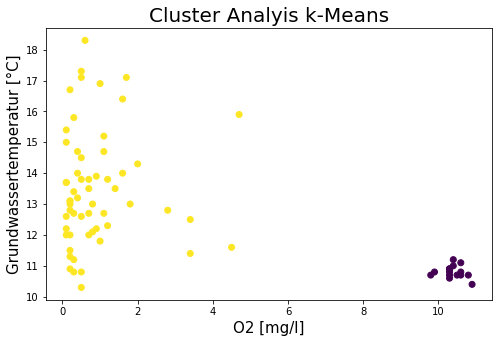

In [7]:
#Plot der Clusteranalyse Sauerstoffgehalt und Temperatur
fig = plt.figure(2, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(data_clus['O2 [mg/l]'], 
           data_clus['T [°C]'], 
        c = data_clus['cluster'])
ax.set_xlabel('O2 [mg/l]', fontsize = 15) 
ax.set_ylabel('Grundwassertemperatur [°C]', fontsize = 15)
ax.set_title('Cluster Analyis k-Means', fontsize = 20) 
plt.show()

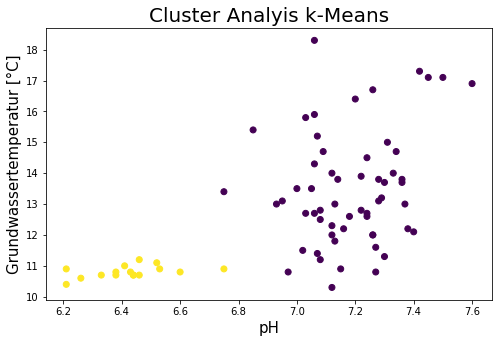

In [70]:
#Plot der Clusteranalyse pH und T
fig = plt.figure(2, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(data_clus['pH [ -]'], 
           data_clus['T [°C]'], 
        c = data_clus['cluster'])
ax.set_xlabel('pH', fontsize = 15) 
ax.set_ylabel('Grundwassertemperatur [°C]', fontsize = 15)
ax.set_title('Cluster Analyis k-Means', fontsize = 20) 
plt.show()

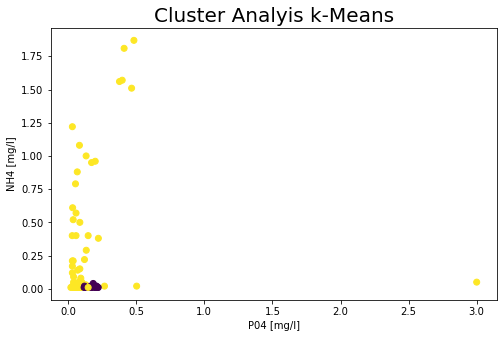

In [8]:
#Plot der Clusteranalyse PO4 und NH4
fig = plt.figure(2, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(data_clus['PO4 [mg/l]'], 
           data_clus['NH4 [mg/l]'], 
        c = data_clus['cluster'])
ax.set_xlabel('P04 [mg/l]', fontsize = 10) 
ax.set_ylabel('NH4 [mg/l]', fontsize = 10)
ax.set_title('Cluster Analyis k-Means', fontsize = 20) 
plt.show()